In [6]:
from tools.ordplan import ORD
from tools.ga import GA
from tools.lp import LP

In [7]:
orders = ORD("data/true_ordplan.csv",0).get()
orders.head()

,เลขที่ใบสั่งขาย,กำหนดส่ง,แผ่นหน้า,ลอน C,แผ่นกลาง,ลอน B,แผ่นหลัง,จำนวนชั้น,ตัดกว้าง,ตัดยาว,จำนวนสั่งขาย,ประเภททับเส้น
0,x25769,5/1/2023,CM127,CM127,CM127,CM127,CM127,5,11.6142,44.0945,1200,Y
1,x25429,5/1/2023,KB120,CM127,CM127,CM127,KB120,5,20.8268,51.1024,2820,N
2,x25436,5/1/2023,KB160,0,0,CM127,KB120,3,22.2441,50.0394,8860,X
3,x25437,5/1/2023,KB160,0,0,CM127,KB160,3,29.2913,51.2992,4290,X
4,x25777,5/1/2023,KB160,CM127,CM127,CM127,KB160,5,4.9213,54.7244,5600,Y


In [8]:
ga_instance = GA(orders,10000).get()
ga_instance.run()

c:\Users\opo25\anaconda3\envs\ortools\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation :  1
Solution :
    cut_width  solution
0     11.6142        45
1     20.8268        26
2     22.2441        84
3     29.2913         0
4      4.9213        39
5     21.1811        63
6      7.3228        74
7     15.2756         2
8     18.0315        20
9     20.1969        71
10    25.7087        15
11    17.5197        50
12    20.0000        67
13    20.3937        81
14    15.9843         0
15    23.6220        21
16    14.9213         2
17    15.6693        47
18    16.1417       108
19    16.6142        73
20    23.2283        38
21    16.0236         8
22    18.3858        37
23    19.0945        12
24    20.3937        17
25    21.9685        21
26    22.7559         7
27    18.3858         0
28    20.5906        17
29    15.7087        73
Used : -19722.406400000007
Waste : 29722.406400000007


Generation :  2
Solution :
    cut_width  solution
0     11.6142        46
1     20.8268         6
2     22.2441        16
3     29.2913        23
4      4.9213        46
5 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


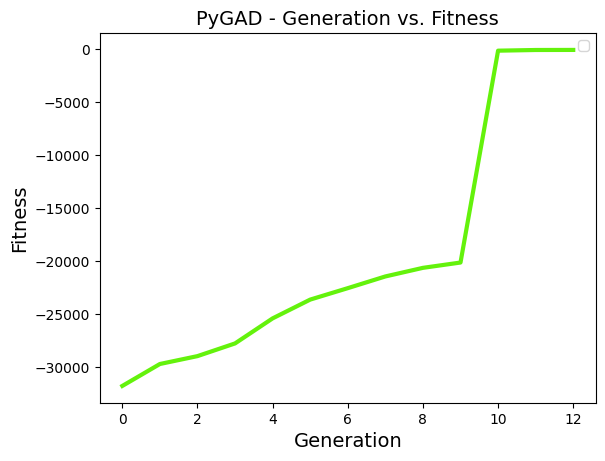

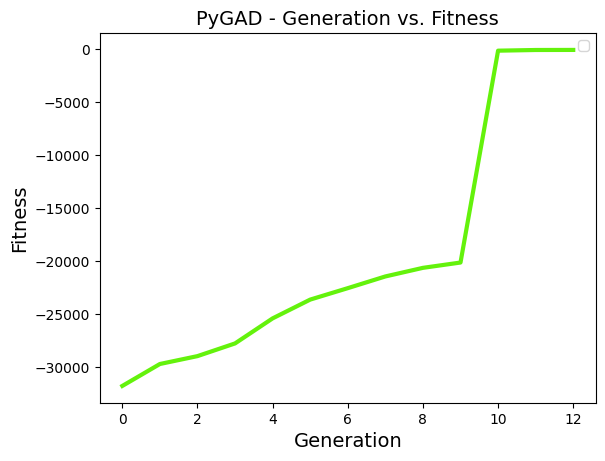

In [9]:
ga_instance.plot_fitness()

In [10]:
lp_instance = LP(orders,10000).run()

Solution :
    cut_width  solution
0     11.6142       0.0
1     20.8268       0.0
2     22.2441       0.0
3     29.2913     125.0
4      4.9213       0.0
5     21.1811       0.0
6      7.3228       2.0
7     15.2756       0.0
8     18.0315      30.0
9     20.1969       1.0
10    25.7087     125.0
11    17.5197       0.0
12    20.0000       0.0
13    20.3937     125.0
14    15.9843       0.0
15    23.6220       0.0
16    14.9213       0.0
17    15.6693       0.0
18    16.1417       0.0
19    16.6142       0.0
20    23.2283       0.0
21    16.0236       0.0
22    18.3858       0.0
23    19.0945       0.0
24    20.3937       0.0
25    21.9685       0.0
26    22.7559       0.0
27    18.3858       0.0
28    20.5906       0.0
29    15.7087       0.0
Used : 10000.0
Waste : 0.0


